# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.369507e+01     1.627943e+01
 * time: 0.002869129180908203
     1     6.287009e+01     8.739848e+00
 * time: 0.008686065673828125
     2     5.725046e+01     1.009745e+01
 * time: 0.02186298370361328
     3     4.127803e+01     8.426311e+00
 * time: 0.03921198844909668
     4     3.100594e+01     7.522845e+00
 * time: 0.05697298049926758
     5     2.496290e+01     6.213246e+00
 * time: 0.07241415977478027
     6     1.236953e+01     2.427186e+00
 * time: 0.08827710151672363
     7     1.179217e+01     4.602599e+00
 * time: 0.15586304664611816
     8     8.809539e+00     3.466660e+00
 * time: 0.16915202140808105
     9     8.169834e+00     2.287674e+00
 * time: 0.18209099769592285
    10     7.548604e+00     4.149710e+00
 * time: 0.19255399703979492
    11     7.243968e+00     2.441120e+00
 * time: 0.2028031349182129
    12     6.936912e+00     1.586388e+00
 * time: 0.21317601203918457
    13     6.445527e+00     1.559043e+00
 * time

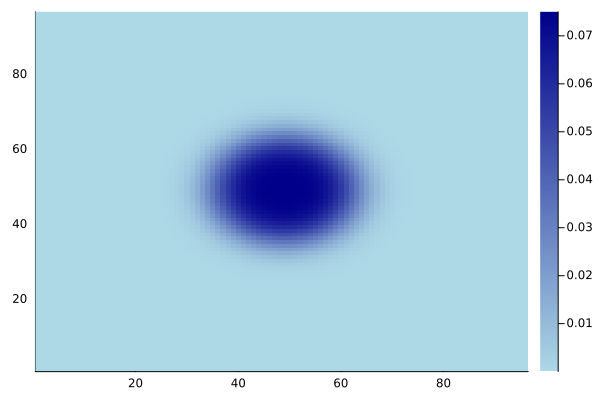

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)